## 1. Data

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from torchvision import transforms, datasets
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,)),  # mean value = 0.1307, standard deviation value = 0.3081
])

In [4]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('MNIST', train=True, download=False, transform=transforms.ToTensor()),
    batch_size = batch_size, shuffle=True)

In [5]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('MNIST', train=False, transform=transforms.ToTensor()),
    batch_size= batch_size)

## 2. Model

In [116]:
class classification(nn.Module):
    def __init__(self):
        super(classification, self).__init__()
        
        # construct layers for a neural network
        self.classifier1 = nn.Sequential(
            nn.Linear(in_features=28*28, out_features=20*20),
            nn.Sigmoid(),
        ) 
        self.classifier2 = nn.Sequential(
            nn.Linear(in_features=20*20, out_features=10*10),
            nn.Sigmoid(),
        ) 
        self.classifier3 = nn.Sequential(
            nn.Linear(in_features=10*10, out_features=10),
            nn.LogSoftmax(dim=1),
        ) 
        
        
    def forward(self, inputs):                 # [batchSize, 1, 28, 28]
        x = inputs.view(inputs.size(0), -1)    # [batchSize, 28*28]
        x = self.classifier1(x)                # [batchSize, 20*20]
        x = self.classifier2(x)                # [batchSize, 10*10]
        out = self.classifier3(x)              # [batchSize, 10]
        
        return out

model = classification()
model

classification(
  (classifier1): Sequential(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): Sigmoid()
  )
  (classifier2): Sequential(
    (0): Linear(in_features=400, out_features=100, bias=True)
    (1): Sigmoid()
  )
  (classifier3): Sequential(
    (0): Linear(in_features=100, out_features=10, bias=True)
    (1): LogSoftmax(dim=1)
  )
)

## 3. 학습

In [117]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('MNIST', train=True, download=False, transform=transforms.ToTensor()),
    batch_size=32, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('MNIST', train=False, transform=transforms.ToTensor()),
    batch_size=32)

In [118]:
criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
model.train()
train_loss = []
train_accu = []

i = 0
for epoch in range(60):
    for data, target in train_loader:
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        
        # train data
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        
        optimizer.step()
        prediction = output.data.max(1)[1]   
        accuracy = prediction.eq(target.data).sum() / batch_size * 100
        
        if i % 3000 == 0:
            print('Train Step: {}\tLoss: {:.3f}\tAccuracy: {:.3f}'.format(i, loss.data, accuracy))
        i += 1
    train_accu.append(accuracy)
    train_loss.append(loss.data)

Train Step: 0	Loss: 2.338	Accuracy: 6.250


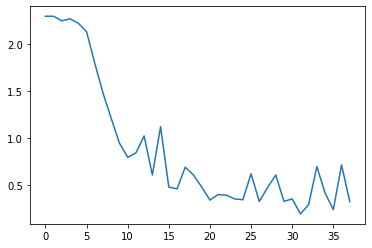

In [107]:
plt.plot([i for i in range(len(train_loss))], train_loss)

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()